<a href="https://colab.research.google.com/github/michael-0907/tibami/blob/main/bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder


In [2]:
data = pd.read_csv("/content/sample_data/bank-full.csv", encoding="utf-8", sep=";")
# data = pd.read_csv("/content/sample_data/bank-additional-full.csv", encoding="utf-8")


In [ ]:
data.info()
data.isna().sum()


In [3]:
display(data.columns)
display(data.shape)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

(45211, 17)

In [ ]:
for i, col in enumerate(data.columns):
  print(f"{i+1}. col_name: {col}, dtype: {data[col].dtype}, isna: {data[col].isna().any()}, unique_num: {data[col].nunique()}")
  print(data[col].unique())

1. col_name: age, dtype: int64, isna: False, unique_num: 77
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
2. col_name: job, dtype: object, isna: False, unique_num: 12
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
3. col_name: marital, dtype: object, isna: False, unique_num: 3
['married' 'single' 'divorced']
4. col_name: education, dtype: object, isna: False, unique_num: 4
['tertiary' 'secondary' 'unknown' 'primary']
5. col_name: default, dtype: object, isna: False, unique_num: 2
['no' 'yes']
6. col_name: balance, dtype: int64, isna: False, unique_num: 7168
[ 2143    29     2 ...  8205 14204 16353]
7. col_name: housing, dtype: object, isna: False, unique_num: 2
['yes' 'no']
8. col_name: loan, dtype

In [ ]:
data["y"] = data["y"].map({"yes": 1, "no": 0})

In [ ]:
data["month"] = data["month"].map({'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'oct': 10,
                    'nov': 11 ,'dec': 12, 'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'sep': 9})

In [ ]:
for col in data.select_dtypes(include=["object"]):
  if data[col].nunique() == 2:
    data[col] = data[col].map({"yes": 1, "no": 0})


['age', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'y']


Text(0.5, 1.0, 'Feature Correlation Matrix')

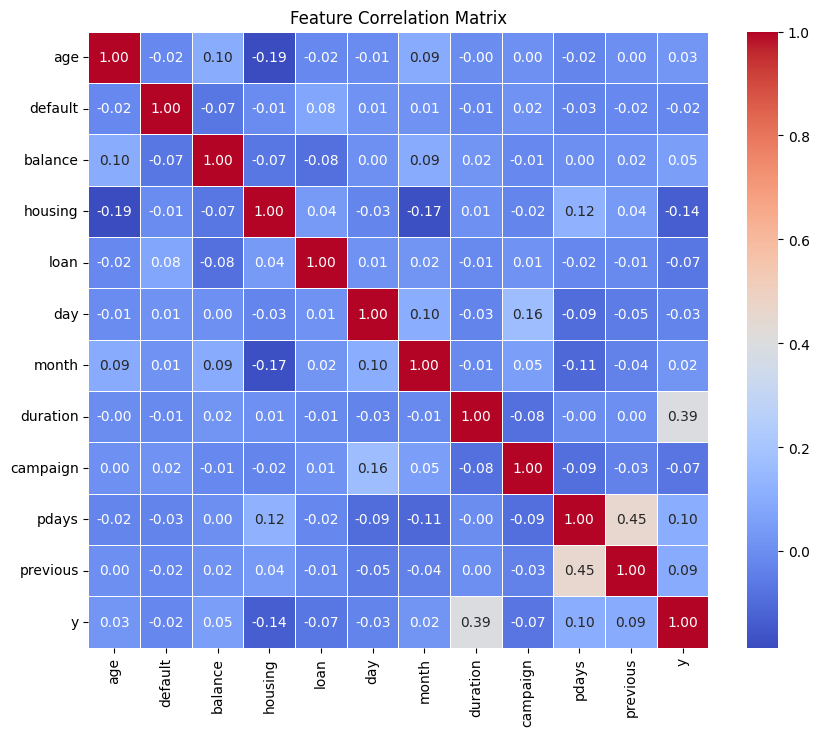

In [ ]:
numerical_features = []
for col in data.select_dtypes(include=["int64"]):
  numerical_features.append(col)
print(numerical_features)
corr_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")

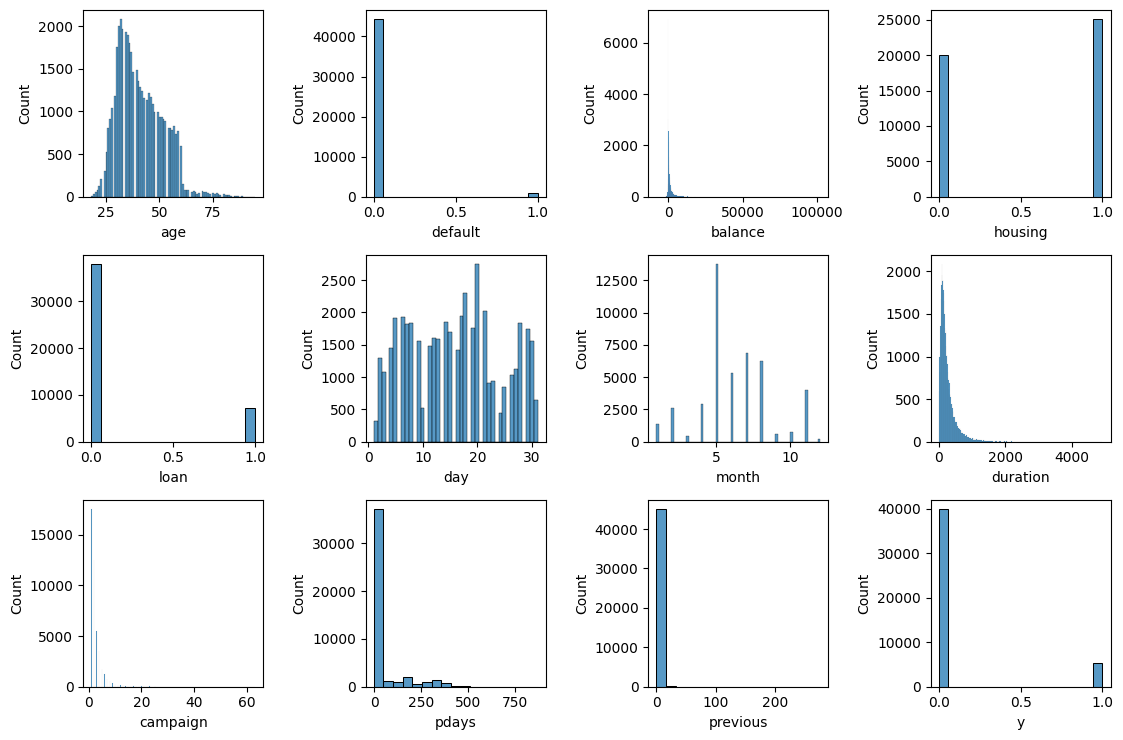

In [ ]:
len(numerical_features)
fig, axes = plt.subplots(3, 4, figsize=(11.33, 7.5))
ax = axes.flatten()
for i, col in enumerate(numerical_features):
  sns.histplot(data=data, x=col, ax=ax[i])
plt.tight_layout()

In [ ]:
display(data["y"].value_counts())
display(data["y"].value_counts(normalize=True))

,count
y,
0,39922
1,5289


,proportion
y,
0,0.883015
1,0.116985


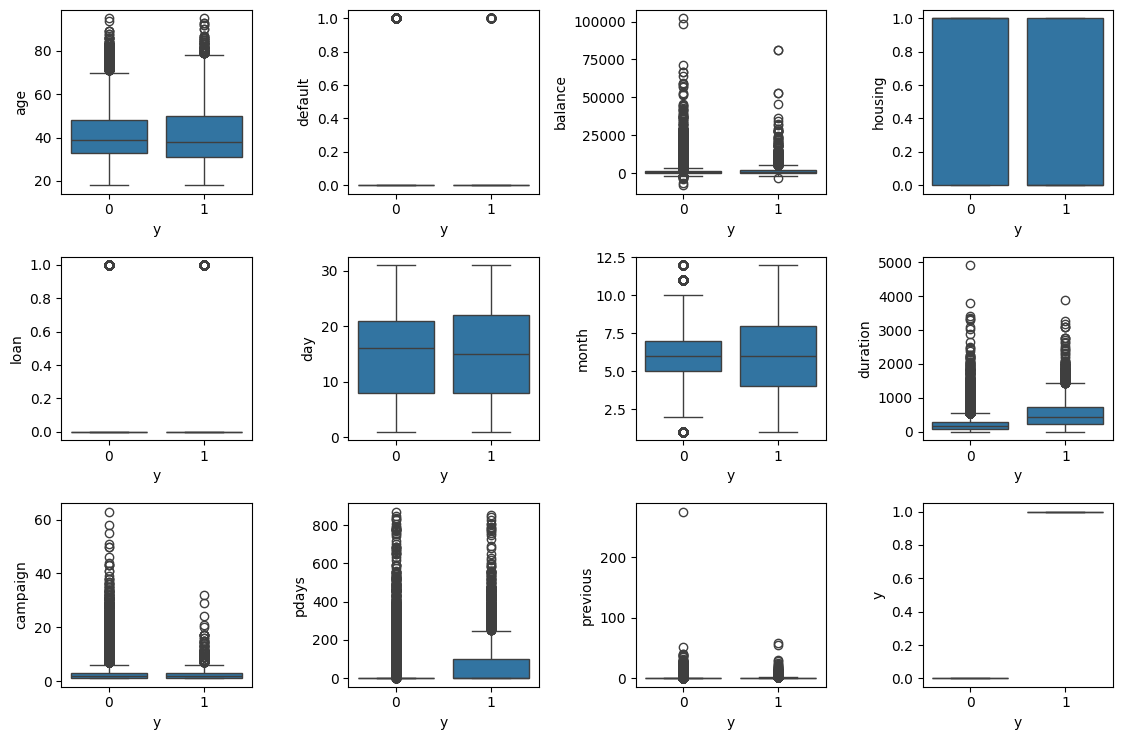

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(11.33, 7.5))
ax = axes.flatten()
for i, col in enumerate(numerical_features):
  sns.boxplot(data=data, x="y", y=col, ax=ax[i])
plt.tight_layout()

In [ ]:
data[numerical_features].describe()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


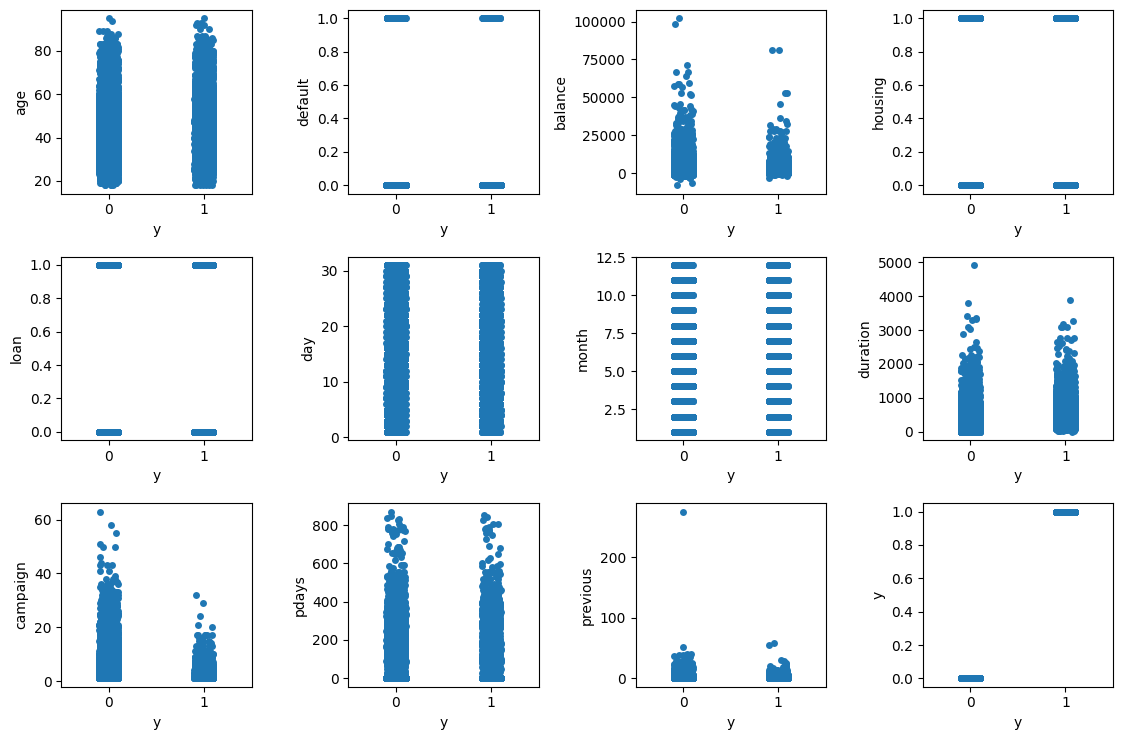

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(11.33, 7.5))
ax = axes.flatten()
for i, col in enumerate(numerical_features):
  sns.stripplot(data=data, x="y", y=col, ax=ax[i])
plt.tight_layout()

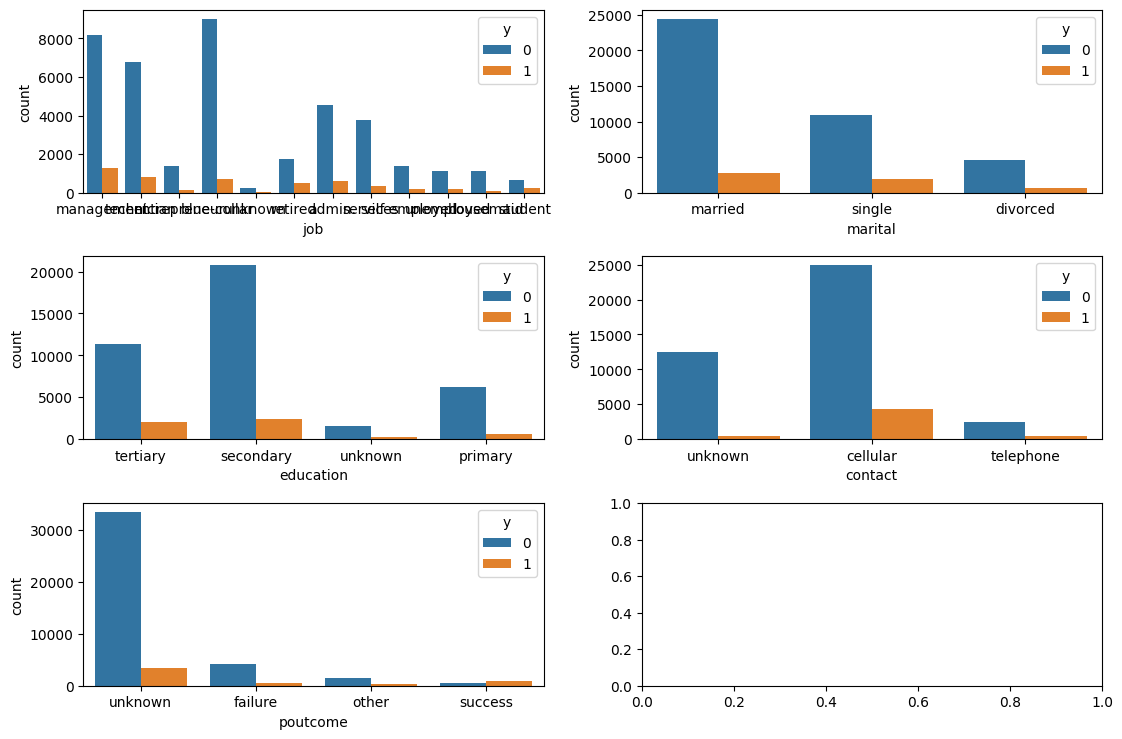

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(11.33, 7.5))
ax = axes.flatten()
for i, col in enumerate(['job', 'marital', 'education', 'contact', 'poutcome']):
  sns.countplot(data=data, x=col, hue="y", ax=ax[i])
plt.tight_layout()

In [ ]:
X = data.drop(columns=["y"])
y = data["y"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(36168, 16) (36168,)
(9043, 16) (9043,)


In [ ]:
X_train.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24001,36,technician,divorced,secondary,0,861,0,0,telephone,29,8,140,2,-1,0,unknown
43409,24,student,single,secondary,0,4126,0,0,cellular,5,4,907,4,185,7,failure
20669,44,technician,single,secondary,0,244,1,0,cellular,12,8,1735,4,-1,0,unknown


In [ ]:
X_test.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1392,40,blue-collar,married,primary,0,640,1,1,unknown,8,5,347,2,-1,0,unknown
7518,44,technician,married,secondary,0,378,1,0,unknown,30,5,203,2,-1,0,unknown
12007,31,services,married,secondary,0,356,1,0,unknown,20,6,228,5,-1,0,unknown


In [ ]:
categorical_features = []
for col in data.select_dtypes(include=["object"]).columns:
  categorical_features.append(col)
  # content = np.char.lower(data[col].unique().astype(str))
  # if "unknown" in content:
  #   print(data[col].value_counts())
  #   print("-" * 30)
categorical_features

['job', 'marital', 'education', 'contact', 'poutcome']

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ("label_encoder", OrdinalEncoder(handle_unknown='error'), categorical_features)], remainder="passthrough")
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=X_train.columns, index=X_train.index)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=X_test.columns, index=X_test.index)
print(X_train_preprocessed.index.equals(y_train.index))
print(X_test_preprocessed.index.equals(y_test.index))

print(X_train_preprocessed.shape, y_train.shape)
print(X_test_preprocessed.shape, y_test.shape)


True
True
(36168, 16) (36168,)
(9043, 16) (9043,)


In [ ]:
X_train_preprocessed.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24001,9.0,0.0,1.0,1.0,3.0,36.0,0.0,861.0,0.0,0.0,29.0,8.0,140.0,2.0,-1.0,0.0
43409,8.0,2.0,1.0,0.0,0.0,24.0,0.0,4126.0,0.0,0.0,5.0,4.0,907.0,4.0,185.0,7.0
20669,9.0,2.0,1.0,0.0,3.0,44.0,0.0,244.0,1.0,0.0,12.0,8.0,1735.0,4.0,-1.0,0.0


In [ ]:
X_test_preprocessed.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1392,1.0,1.0,0.0,2.0,3.0,40.0,0.0,640.0,1.0,1.0,8.0,5.0,347.0,2.0,-1.0,0.0
7518,9.0,1.0,1.0,2.0,3.0,44.0,0.0,378.0,1.0,0.0,30.0,5.0,203.0,2.0,-1.0,0.0
12007,7.0,1.0,1.0,2.0,3.0,31.0,0.0,356.0,1.0,0.0,20.0,6.0,228.0,5.0,-1.0,0.0


In [ ]:
model = RandomForestClassifier(n_estimators=150, max_depth=15, min_samples_leaf=3, class_weight="balanced", random_state=42)
model.fit(X_train_preprocessed, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=3, n_estimators=150, random_state=42)

In [ ]:
# y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train_preprocessed)[:,1]
threshold = 0.70
y_train_pred = (y_train_proba >= threshold).astype("int")
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
print(f"train accuracy: {train_accuracy}")
print(train_report)

print("-" * 50)
# y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test_preprocessed)[:, 1]
y_test_pred = (y_test_proba >= threshold).astype("int")
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
print(f"test accuracy: {test_accuracy}")
print(test_report)



# cm = confusion_matrix(y_test, y_test_pred)
# plt.figure(figsize=(12, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

train accuracy: 0.961319398363194
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     31937
           1       0.87      0.78      0.83      4231

    accuracy                           0.96     36168
   macro avg       0.92      0.88      0.90     36168
weighted avg       0.96      0.96      0.96     36168

--------------------------------------------------
test accuracy: 0.9058940617051864
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.64      0.45      0.53      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.71      0.74      9043
weighted avg       0.90      0.91      0.90      9043



In [ ]:
feature_importance = model.feature_importances_
sorted_index = np.argsort(feature_importance)[::-1]
sorted_feature = X_train.columns[sorted_index]
sorted_importance = feature_importance[sorted_index]

for i, j in zip(sorted_feature, sorted_importance):
  print(f"{i}: {j}")

campaign: 0.44686532009494695
duration: 0.09087383039259876
month: 0.060431514740858505
balance: 0.05943876964066582
loan: 0.05539937194393286
education: 0.05429804867302468
previous: 0.04697701901300323
default: 0.043932312258376065
contact: 0.04138984201852554
poutcome: 0.023313358150916227
pdays: 0.022717355114567753
age: 0.02225849268605934
marital: 0.0124295830581224
job: 0.011233558446863334
day: 0.007985529101812553
housing: 0.00045609466572591866


In [ ]:
X_train["campaign"].value_counts()

,count
campaign,
1,14026
2,10023
3,4412
4,2805
5,1419
6,1018
7,596
8,456
9,251
